In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tqdm import tqdm

## Haar wavelets

In [3]:
def haar_matrix(j: int, shift: int = 0):
    """Unnormalized Haar wavelet basis of size 2^j, shifted by shift"""
    H = torch.zeros(2**j, 2**j)
    n = 1
    H[0] = torch.ones(2**j)
    for k in range(j,0,-1):
        for i in range(2**(j-k)):
            H[n+i,i*2**k:i*2**k+2**(k-1)] = torch.ones(2**(k-1))
            H[n+i,i*2**k+2**(k-1):(i+1)*2**k] = -torch.ones(2**(k-1))
        n = n+i+1
    return H.roll(shift, dims=1)

In [4]:
def norm_haar_matrix(j: int, shift: int = 0):
    """Normalized Haar wavelet basis of size 2^j"""
    H = haar_matrix(j, shift)
    return H/torch.norm(H, dim=1).unsqueeze(1)

In [5]:
def norm_vec(j: int, n: int):
    """ n normed gaussian vector, shape (2**j, n)"""
    v = torch.randn(2**j, n)
    return v/torch.norm(v, dim=0).unsqueeze(0)

In [6]:
def one_vec(j: int, n: int):
    """ n vectors being 1 in one of the top n frequencies, shape (2**j, n)"""
    v = torch.zeros(2**j, n)
    for i in range(n):
        v[i, i] = 1
    return v

## Regular norm

In [7]:
j = 5

In [8]:
v = norm_vec(j, 9)
for shift in tqdm(range(2**j)):
    pixel = torch.einsum("a b, b n -> a n", norm_haar_matrix(j, 0).T, v)
    print(torch.norm(torch.einsum("a b, b n -> n a", norm_haar_matrix(j, shift), pixel), dim=1))

100%|██████████| 32/32 [00:00<00:00, 507.90it/s]

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.00

In [9]:
v = one_vec(j, 9)
for shift in range(2**j):
    pixel = torch.einsum("a b, b n -> a n", norm_haar_matrix(j, 0).T, v)
    print(torch.norm(torch.einsum("a b, b n -> n a", norm_haar_matrix(j, shift), pixel), dim=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([1.0000, 1.0000, 1.00

## Frequency aware norm

In [79]:
j = 13

In [80]:
def frequency_aware_norm(haar_representation: torch.Tensor, j: int):
    n = 2
    for i in range(1,j):
        for k in range(2**i):
            haar_representation[n+k] /= 2**i
        n = n+k+1
    return torch.norm(haar_representation, dim=0)

In [76]:
v = norm_vec(j, 129)
norms1 = torch.zeros(2**j, 129)
H = norm_haar_matrix(j,0)
for shift in tqdm(range(2**j)):
    pixel = torch.einsum("a b, b n -> a n", H.T, v)
    haar_representation = torch.einsum("a b, b n -> a n", H.roll(shift, dims=1), pixel)
    norms1[shift] = frequency_aware_norm(haar_representation, j)

100%|██████████| 1024/1024 [00:09<00:00, 106.15it/s]


In [81]:
v = one_vec(j, 129)
norms2 = torch.zeros(2**j, 129)
H = norm_haar_matrix(j,0)
for shift in tqdm(range(2**j)):
    pixel = torch.einsum("a b, b n -> a n", H.T, v)
    haar_representation = torch.einsum("a b, b n -> a n", H.roll(shift, dims=1), pixel)
    norms2[shift] = frequency_aware_norm(haar_representation, j)

 30%|██▉       | 2428/8192 [14:25:10<34:13:52, 21.38s/it]  


KeyboardInterrupt: 

## j = 10, n = 9

In [72]:
norms1.max(dim=0).values/norms1.min(dim=0).values

tensor([2.4791, 1.8560, 1.4794, 1.5393, 1.8900, 1.3268, 1.8601, 2.4221, 1.9839])

In [19]:
norms2.max(dim=0).values/norms2.min(dim=0).values

tensor([1.0000, 2.1993, 2.0616, 2.0616, 3.0579, 3.0579, 3.0579, 3.0579, 4.4217])

In [78]:
(norms1.max(dim=0).values/norms1.min(dim=0).values).mean()

tensor(1.8685)

## j = 12, n = 33

In [36]:
norms1a = norms1
norms2a = norms2

In [35]:
norms1a.max(dim=0).values/norms1a.min(dim=0).values

tensor([1.5218, 2.6956, 2.4895, 2.2458, 1.3906, 3.0071, 1.6156, 1.5842, 2.7676,
        2.2536, 2.7655, 2.4313, 2.1766, 1.4232, 2.0846, 2.5955, 2.1839, 2.1637,
        1.9257, 1.5634, 1.2279, 2.6426, 1.9085, 1.7046, 2.9332, 2.3094, 1.4020,
        2.9592, 2.2245, 1.5145, 2.0782, 2.1832, 1.5180])

In [58]:
(norms1a.max(dim=0).values/norms1a.min(dim=0).values).min()

tensor(1.2279)

In [69]:
(norms1a.max(dim=0).values/norms1a.min(dim=0).values).mean()

tensor(2.1058)

In [59]:
(norms1a.max(dim=0).values/norms1a.min(dim=0).values).max()

tensor(3.0071)

In [34]:
norms2a.max(dim=0).values/norms2a.min(dim=0).values

tensor([1.0000, 2.1993, 2.0616, 2.0616, 3.0579, 3.0579, 3.0579, 3.0579, 4.4217,
        4.4217, 4.4217, 4.4217, 4.4217, 4.4217, 4.4217, 4.4217, 6.3208, 6.3208,
        6.3208, 6.3208, 6.3208, 6.3208, 6.3208, 6.3208, 6.3208, 6.3208, 6.3208,
        6.3208, 6.3208, 6.3208, 6.3208, 6.3208, 8.9864])

In [65]:
torch.save(norms1a, "norms1a.pt")

In [66]:
torch.save(norms2a, "norms2a.pt")

## j = 13, n = 129

In [56]:
norms1b = norms1

In [82]:
norms2b = norms2

In [57]:
norms1b.max(dim=0).values/norms1b.min(dim=0).values

tensor([2.0320, 1.6523, 2.2250, 2.0483, 2.6199, 2.9216, 2.2071, 2.9874, 2.5410,
        1.7728, 2.1541, 1.4905, 2.3495, 2.2236, 1.9648, 2.5242, 1.2600, 2.1269,
        1.8705, 1.6548, 2.4509, 2.4557, 1.5856, 1.4926, 1.5051, 3.0860, 2.0310,
        1.7126, 2.4105, 2.5827, 2.6758, 1.6631, 2.9757, 2.4094, 2.0377, 2.2674,
        2.6379, 1.5140, 2.1249, 1.5115, 2.1895, 2.1939, 2.2834, 2.5565, 2.5221,
        1.4115, 2.4250, 3.0849, 1.3808, 2.9790, 1.5485, 1.7813, 1.6944, 1.9209,
        1.8225, 2.4753, 1.6584, 2.6736, 2.8690, 2.2874, 2.8011, 1.7057, 1.5766,
        1.7388, 2.1430, 1.9337, 1.4727, 2.5674, 2.7453, 1.3886, 2.1579, 2.2048,
        2.7977, 1.5959, 2.4958, 2.0643, 2.0475, 1.7889, 1.7149, 1.6296, 2.5379,
        2.7414, 2.0819, 1.5858, 2.1011, 1.3161, 2.6764, 2.5027, 2.0889, 1.4963,
        2.1003, 2.3869, 2.3383, 2.6967, 2.5413, 3.0339, 1.4883, 2.6273, 2.0255,
        1.9482, 2.1095, 2.1177, 2.1336, 2.1892, 1.6260, 1.6372, 1.6956, 1.7311,
        1.4411, 2.0823, 1.9801, 2.6603, 

In [88]:
norms2b[:2428].max(dim=0).values/norms2b[:2428].min(dim=0).values

tensor([ 1.0000,  2.1993,  2.0616,  2.0616,  3.0579,  2.0616,  3.0579,  2.0616,
         4.4217,  4.4217,  3.2594,  3.0579,  4.4217,  4.4217,  3.2594,  3.0579,
         6.3208,  6.3208,  6.3208,  6.3208,  6.3208,  4.4217,  4.4217,  4.4217,
         6.3208,  6.3208,  6.3208,  6.3208,  6.3208,  4.4217,  4.4217,  4.4217,
         8.9865,  8.9865,  8.9865,  8.9865,  8.9865,  8.9865,  8.9865,  8.9865,
         8.9865,  8.6321,  6.3208,  6.3208,  6.3208,  6.3208,  6.3208,  6.3208,
         8.9865,  8.9865,  8.9865,  8.9865,  8.9865,  8.9865,  8.9865,  8.9865,
         8.9865,  8.6321,  6.3208,  6.3208,  6.3208,  6.3208,  6.3208,  6.3208,
        12.7422, 12.7422, 12.7422, 12.7422, 12.7422, 12.7422, 12.7422, 12.7422,
        12.7422, 12.7422, 12.7422, 12.7422, 12.7422, 12.7422, 12.7422, 12.7422,
        12.7422, 12.7422, 12.7422,  8.9865,  8.9865,  8.9865,  8.9865,  8.9865,
         8.9865,  8.9865,  8.9865,  8.9865,  8.9865,  8.9865,  8.9865,  8.9865,
        12.7422, 12.7422, 12.7422, 12.74

In [60]:
(norms1b.max(dim=0).values/norms1b.min(dim=0).values).min()

tensor(1.2600)

In [68]:
(norms1b.max(dim=0).values/norms1b.min(dim=0).values).mean()

tensor(2.1325)

In [61]:
(norms1b.max(dim=0).values/norms1b.min(dim=0).values).max()

tensor(3.5627)

In [63]:
torch.save(norms1b, "norms1b.pt")

# Frequency aware norm sqrt

In [89]:
def frequency_aware_norm(haar_representation: torch.Tensor, j: int):
    n = 2
    for i in range(1,j):
        for k in range(2**i):
            haar_representation[n+k] /= 2**(i/2)
        n = n+k+1
    return torch.norm(haar_representation, dim=0)

In [90]:
j = 10

In [91]:
v = norm_vec(j, 9)
norms1 = torch.zeros(2**j, 9)
H = norm_haar_matrix(j,0)
for shift in tqdm(range(2**j)):
    pixel = torch.einsum("a b, b n -> a n", H.T, v)
    haar_representation = torch.einsum("a b, b n -> a n", H.roll(shift, dims=1), pixel)
    norms1[shift] = frequency_aware_norm(haar_representation, j)

100%|██████████| 1024/1024 [00:09<00:00, 105.45it/s]


In [95]:
v = one_vec(j, 17)
norms2 = torch.zeros(2**j, 17)
H = norm_haar_matrix(j,0)
for shift in tqdm(range(2**j)):
    pixel = torch.einsum("a b, b n -> a n", H.T, v)
    haar_representation = torch.einsum("a b, b n -> a n", H.roll(shift, dims=1), pixel)
    norms2[shift] = frequency_aware_norm(haar_representation, j)

100%|██████████| 1024/1024 [00:10<00:00, 97.95it/s]


In [93]:
norms1.max(dim=0).values/norms1.min(dim=0).values

tensor([1.3020, 1.1610, 1.2655, 1.1664, 1.1568, 1.2649, 1.2955, 1.2952, 1.2308])

In [96]:
norms2.max(dim=0).values/norms2.min(dim=0).values

tensor([1.0000, 1.5769, 1.5667, 1.5667, 1.8089, 1.8089, 1.8089, 1.8089, 2.0220,
        2.0220, 2.0220, 2.0220, 2.0220, 2.0220, 2.0220, 2.0220, 2.2135])

## Does sparsity translate across shifts?

In [7]:
j = 10

In [8]:
N = 5000

In [9]:
H_ = norm_haar_matrix(j,0)

In [10]:
H = torch.stack([H_.roll(i) for i in tqdm(range(2**j))])

100%|██████████| 1024/1024 [00:00<00:00, 1128.84it/s]


In [11]:
H.shape

torch.Size([1024, 1024, 1024])

In [12]:
def sample_sparse_a(N, j):
    a = torch.randn(N,2**j)
    n = 2
    for i in range(1,j):
        for k in range(2**i):
            a[:,n+k] /= 2**i
        n = n+k+1
    return a

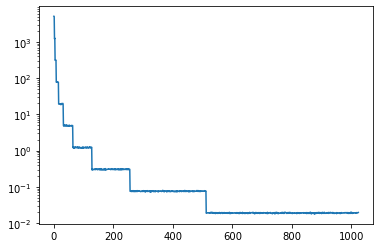

In [13]:
plt.yscale("log")
plt.plot(torch.sum(sample_sparse_a(N, j)**2, axis=0))

In [14]:
x = torch.einsum("b a, n b -> n a", H_, sample_sparse_a(N,j))

In [15]:
idx = torch.randint(2**j, (N,))

In [16]:
shifted_a = torch.einsum("n a b, n b -> n a", H[idx], x)

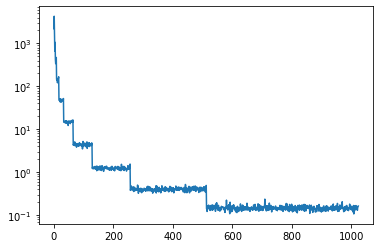

In [17]:
plt.yscale("log")
plt.plot(torch.sum(shifted_a**2, axis=0))

## Sqrt sparse 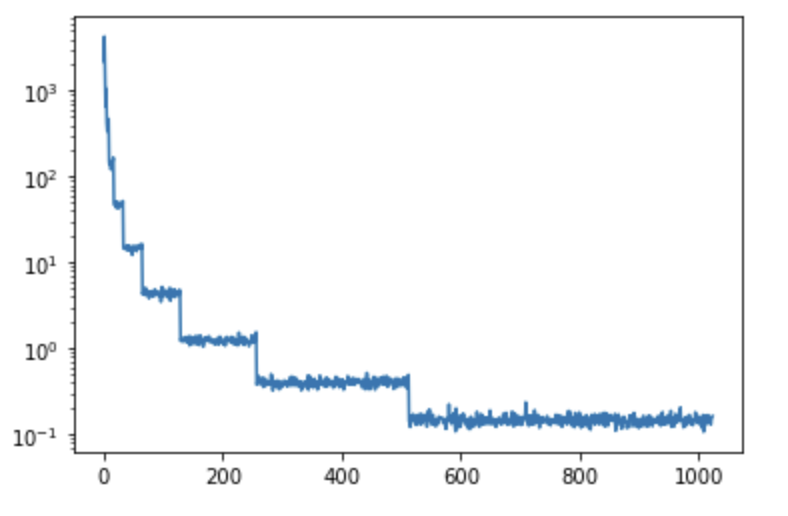

In [19]:
def sample_sqrt_sparse_a(N, j):
    a = torch.randn(N,2**j)
    n = 2
    for i in range(1,j):
        for k in range(2**i):
            a[:,n+k] /= 2**(i/2)
        n = n+k+1
    return a

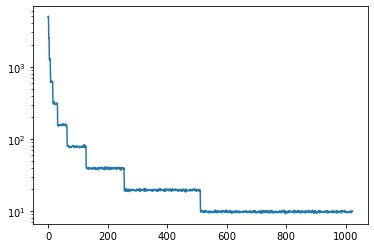

In [20]:
plt.yscale("log")
plt.plot(torch.sum(sample_sqrt_sparse_a(N, j)**2, axis=0))

In [25]:
x = torch.einsum("b a, n b -> n a", H_, sample_sqrt_sparse_a(N,j))

In [26]:
idx = torch.randint(2**j, (N,))

In [27]:
shifted_a = torch.einsum("n a b, n b -> n a", H[idx], x)

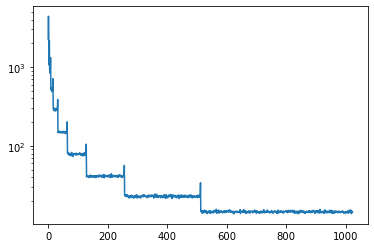

In [28]:
plt.yscale("log")
plt.plot(torch.sum(shifted_a**2, axis=0))